# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, on="Mouse ID",how="inner")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Display the data table for preview
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
w151    10
q633    10
i635    10
r554    10
        ..
d133     1
b447     1
t573     1
x226     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_vol_df=clean_df.iloc[:,[1, 6]]
drug_group_df=tumor_vol_df.groupby(["Drug Regimen"])

drug_group_mean_df=drug_group_df.mean()
drug_group_median_df=drug_group_df.median()
drug_group_var_df=drug_group_df.var()
drug_group_std_df=drug_group_df.std()
drug_group_sem_df=drug_group_df.sem()


mean_df=drug_group_mean_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Mean"})
median_df=drug_group_median_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Median"})
var_df=drug_group_var_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"Variance"})
std_df=drug_group_std_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"STD"})
sem_df=drug_group_sem_df.rename(columns={"Drug Regimen":"Drug Regimen","Tumor Volume (mm3)":"SEM"})


drug_summary_df=pd.merge(mean_df,median_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(var_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(std_df, on="Drug Regimen")
drug_summary_df=drug_summary_df.merge(sem_df, on="Drug Regimen")
drug_summary_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df.agg(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
drug_group_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
10,Capomulin,45.000000
11,Capomulin,43.878496
12,Capomulin,37.614948
13,Capomulin,38.177232
14,Capomulin,36.866876


## Bar and Pie Charts

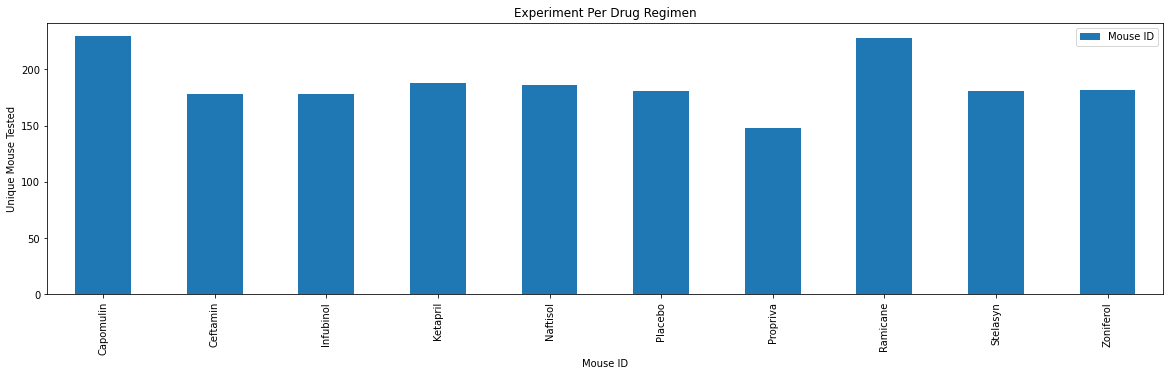

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_test=pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count().reset_index())
drug_test[["Drug Regimen","Mouse ID"]]

drug_test_df=drug_test[["Drug Regimen","Mouse ID"]]
drug_test_df
drug_test_df=drug_test_df.set_index("Drug Regimen")

drug_test_df.plot(kind = "bar", figsize = (20,5))

plt.title("Experiment Per Drug Regimen")
plt.xlabel("Mouse ID")
plt.ylabel("Unique Mouse Tested")
plt.show()


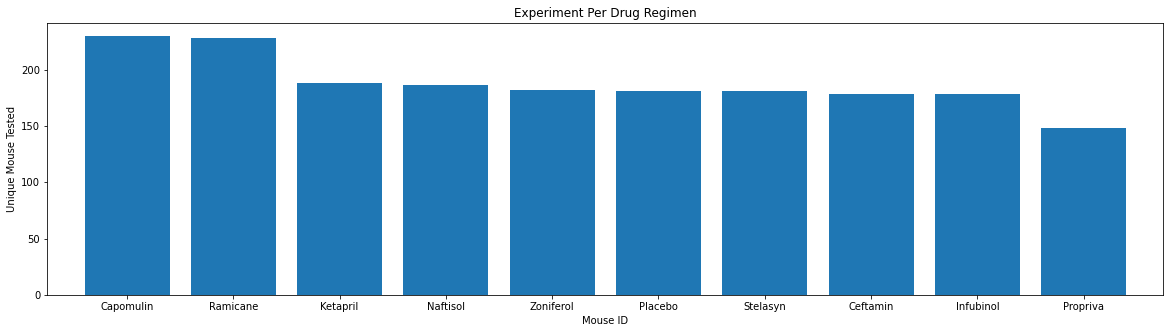

In [40]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.

plt.figure(figsize=(20,5))
plt.bar(clean_df["Drug Regimen"].value_counts().index,clean_df["Drug Regimen"].value_counts(),align="center")

plt.xlim(-0.75, len(clean_df["Drug Regimen"].value_counts().index)-0.25)
plt.title("Experiment Per Drug Regimen")
plt.xlabel("Mouse ID")
plt.ylabel("Unique Mouse Tested")
plt.show()

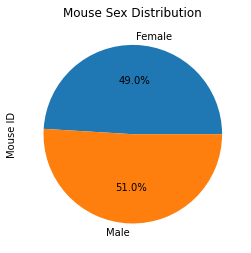

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_df=pd.DataFrame(clean_df.groupby(["Sex"]).count())
mouse_gender_df=mouse_gender_df["Mouse ID"]
mouse_gender_df

mouse_gender_df.plot.pie(subplots=True, figsize =(4,5) ,autopct="%1.1f%%")
plt.title("Mouse Sex Distribution")
plt.show()

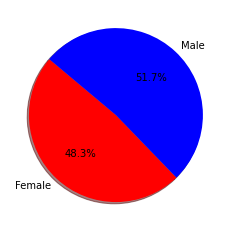

In [141]:

labels = ["Female", "Male"]
sizes = [922, 985]
colors = ["red", "blue"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df=pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
timepoint_df=timepoint_df.sort_values(by=["Timepoint"])
timepoint_df=timepoint_df.reset_index()
timepoint_df.head()

timepoint_merged_df=pd.merge(clean_df,timepoint_df,on="Mouse ID")
timepoint_merged_df=timepoint_merged_df.rename(columns={"Timepoint_y":"Max Timepoint"})
timepoint_merged_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df=timepoint_merged_df.loc[timepoint_merged_df["Drug Regimen"]==drug]
    treatment_df=timepoint_merged_df.loc[timepoint_merged_df[""]==]
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

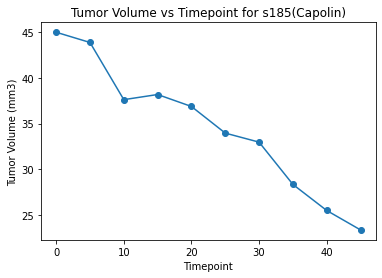

In [119]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capo_df
s185_df=clean_df.loc[clean_df["Mouse ID"]=="s185"]
s185_df

plt.plot(s185_df["Timepoint"],s185_df["Tumor Volume (mm3)"],marker="o")
plt.title("Tumor Volume vs Timepoint for s185(Capolin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

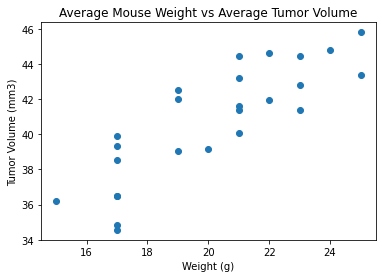

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capo_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
avg_weight_capo_df=pd.DataFrame(avg_capo_df.groupby("Mouse ID")["Weight (g)"].mean())
avg_weight_capo_df
avg_volume_capo_df=pd.DataFrame(avg_capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_volume_capo_df
avg_capo_df2=pd.merge(avg_weight_capo_df,avg_volume_capo_df,on="Mouse ID")
avg_capo_df2

x_axis=avg_capo_df2["Weight (g)"]
y_axis=avg_capo_df2["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.title("Average Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is 0.84


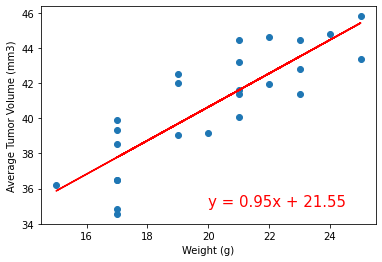

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r = st.pearsonr(x_axis, y_axis)
print(f" The correlation between average mouse weight and the average tumor volume is {round(r[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()